# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

# **PACE stages**


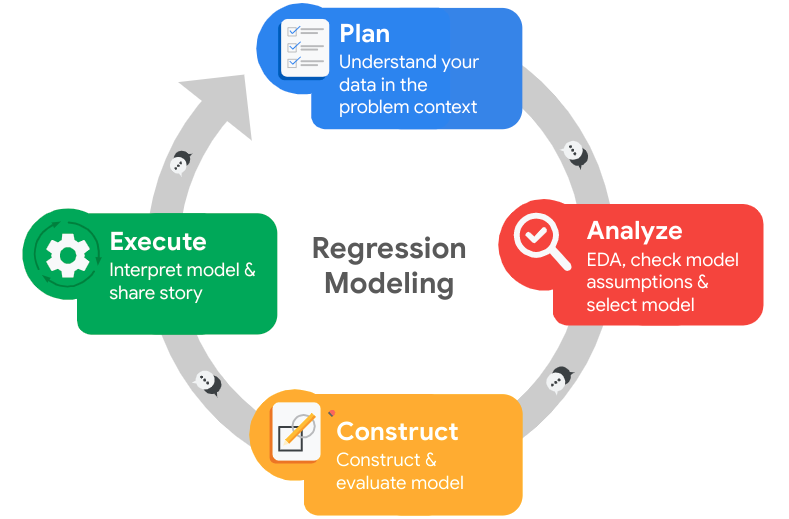

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to **build a model that predicts whether or not an employee will leave the company**.

If you can predict employees likely to quit, it might be possible to **identify factors that contribute to their leaving**. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [29]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [30]:
# Load dataset into a dataframe
df0 = pd.read_csv("/Users/lennartmuller/Desktop/Google Certificate/Google Capstone/HR_comma_sep.csv")

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

### Gather basic information about the data

In [31]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [32]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Clean and rename columns

In [33]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [34]:
# Rename columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [35]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [36]:
df0.duplicated().sum()

3008

In [37]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [38]:
# Drop duplicates
df1 = df0.drop_duplicates(keep="first")

df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

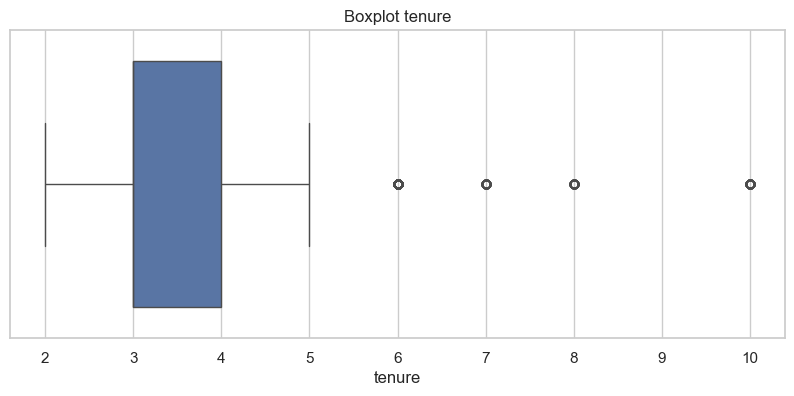

In [39]:
# Boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(10, 4))
plt.title("Boxplot tenure", fontsize=12)
sns.boxplot(x=df1["tenure"])
plt.show()

In [40]:
# Number of rows containing outliers (in tenure)

# 25th percentile
percentile25 = df1["tenure"].quantile(0.25)

# 75th percentile
percentile75 = df1["tenure"].quantile(0.75)

# Interquartile range
iqr = percentile75 - percentile25

lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr
print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]

print("\nNumber of rows with outliers in tenure:", len(outliers))

Lower Limit: 1.5
Upper Limit: 5.5

Number of rows with outliers in tenure: 824


**&rarr; Depending on which models are selected later, the outliers should be removed**

# pAce: Analyze Stage



## Step 2. Data Exploration (EDA)

In [41]:
# Numbers of people who left [1] vs. stayed [0]
print(df1["left"].value_counts())

# Percentages
print()
print(df1["left"].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

/var/folders/7t/p2y0s3m500lc31ps9vl7kj8m0000gn/T/ipykernel_61430/3915419639.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sat_department, x="department", y="satisfaction_level", palette="viridis", ax=ax[1])
/var/folders/7t/p2y0s3m500lc31ps9vl7kj8m0000gn/T/ipykernel_61430/3915419639.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sat_left, x="left", y="satisfaction_level", palette="viridis", ax=ax[2])


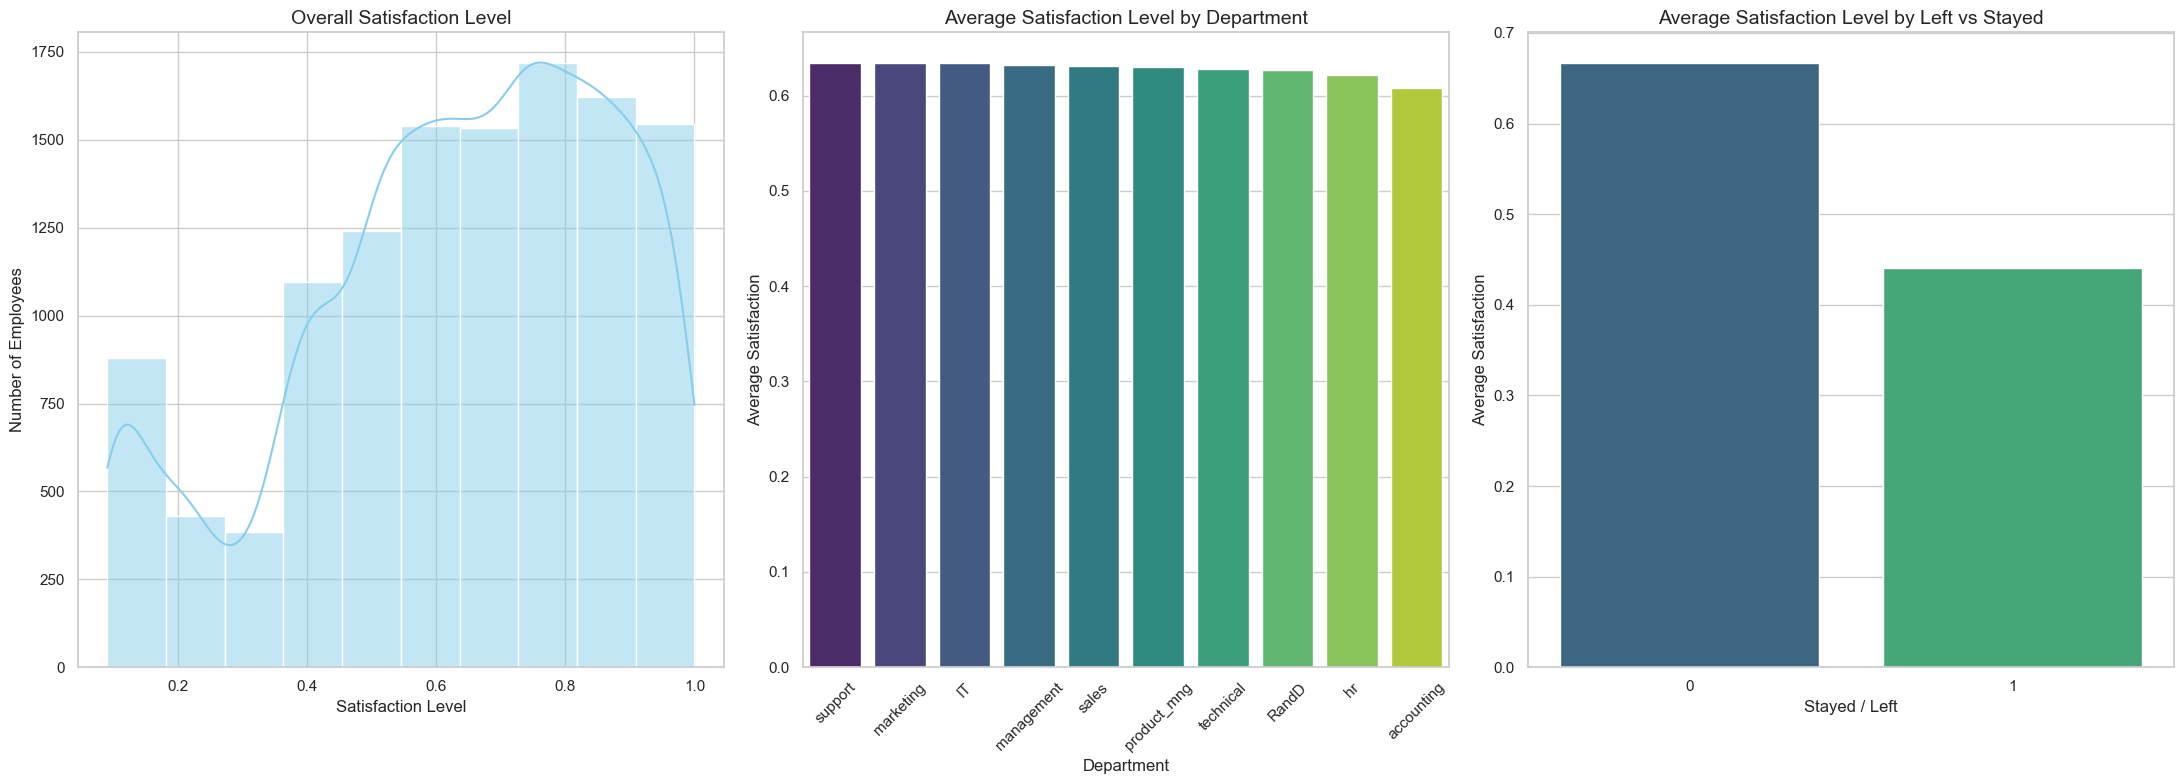

In [42]:
# Satisfaction level (by department)

sns.set(style="whitegrid")

avg_sat_department = df1.groupby("department")["satisfaction_level"].mean().reset_index()
avg_sat_department = avg_sat_department.sort_values("satisfaction_level", ascending=False)

avg_sat_left = df1.groupby("left")["satisfaction_level"].mean().reset_index()

fig, ax = plt.subplots(1, 3, figsize=(22, 8))

# Plot 1: Histogram of overall satisfaction
sns.histplot(df1["satisfaction_level"], bins=10, kde=True, color="skyblue", ax=ax[0])
ax[0].set_title("Overall Satisfaction Level", fontsize=14)
ax[0].set_xlabel("Satisfaction Level")
ax[0].set_ylabel("Number of Employees")

# Plot 2: Barplot of average satisfaction per department
sns.barplot(data=avg_sat_department, x="department", y="satisfaction_level", palette="viridis", ax=ax[1])
ax[1].set_title("Average Satisfaction Level by Department", fontsize=14)
ax[1].set_xlabel("Department")
ax[1].set_ylabel("Average Satisfaction")
ax[1].tick_params(axis='x', rotation=45)

# Plot 3: Average satisfaction of employees who left and those who stayed
sns.barplot(data=avg_sat_left, x="left", y="satisfaction_level", palette="viridis", ax=ax[2])
ax[2].set_title("Average Satisfaction Level by Left vs Stayed", fontsize=14)
ax[2].set_xlabel("Stayed / Left")
ax[2].set_ylabel("Average Satisfaction")

# Tight layout
plt.tight_layout()
plt.show()

In [43]:
# Mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

/var/folders/7t/p2y0s3m500lc31ps9vl7kj8m0000gn/T/ipykernel_61430/2899785200.py:2: FutureWarning: The provided callable <function mean at 0x108aa4fe0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
/var/folders/7t/p2y0s3m500lc31ps9vl7kj8m0000gn/T/ipykernel_61430/2899785200.py:2: FutureWarning: The provided callable <function median at 0x108bcdd00> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


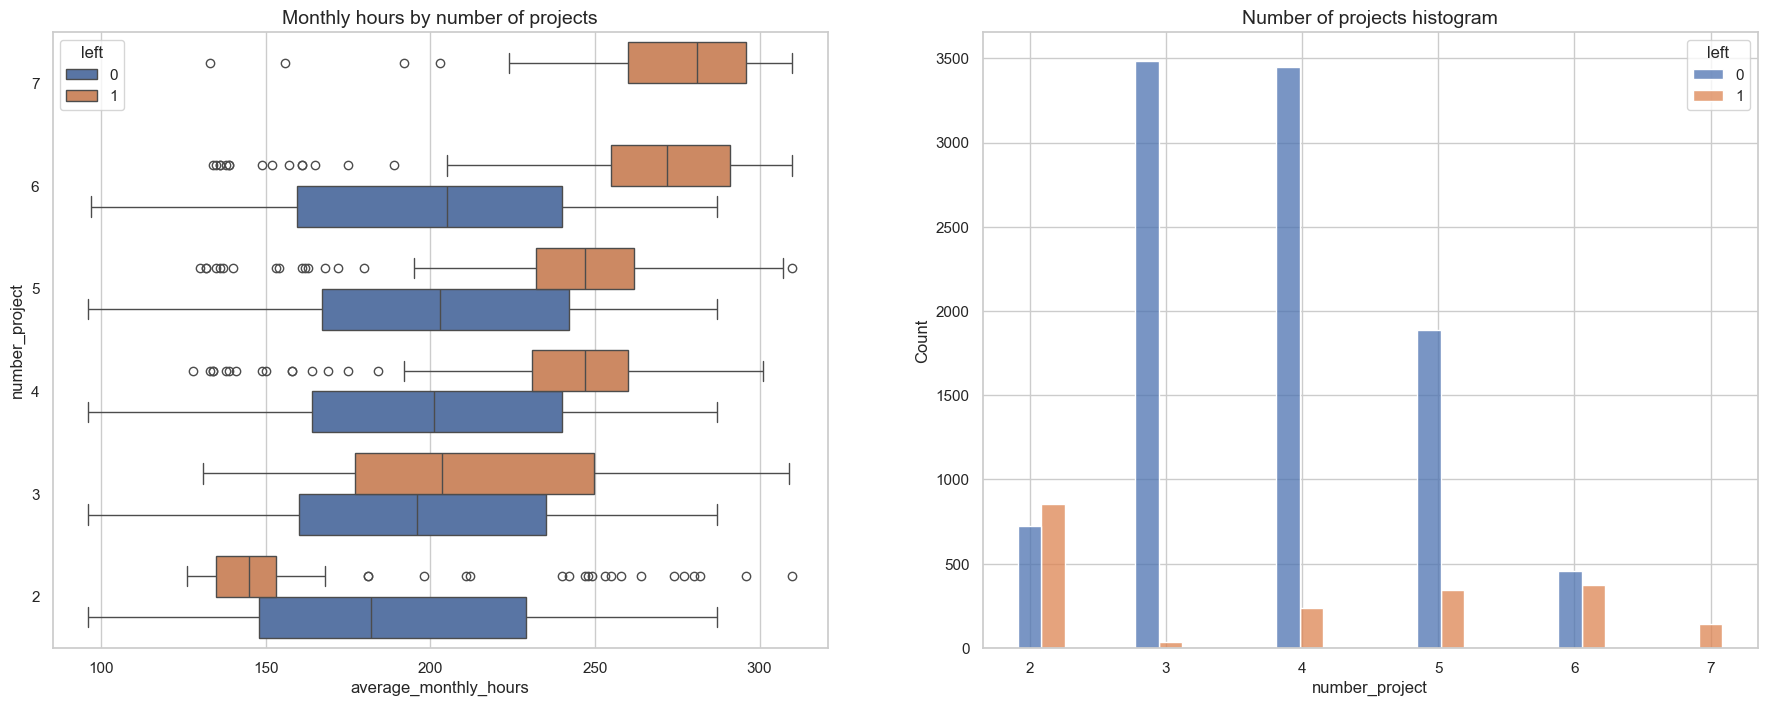

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Plot 1: Boxplot showing `average_monthly_hours` distributions for `number_project`, 
# comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Plot 2: Histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

plt.show()

In [45]:
# Confirmation that everybody with 7 projects left 
df1[df1["number_project"] == 7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

&rarr; With increasing number of projects the average of monthy hours increases

&rarr; There are two groups of employees who left the company: 
(A) those who worked considerably less than their peers with the same number of projects, and 
(B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

&rarr; Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255–295 hours/month—much more than any other group

&rarr; The optimal number of projects for employees to work on seems to be 3–4. The ratio of left/stayed is very small for these cohorts.

In [46]:
# Average monthly hours

avg_hours = df1["average_monthly_hours"].mean()
avg_hours

200.4735218080227

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = **166.67 hours per month**

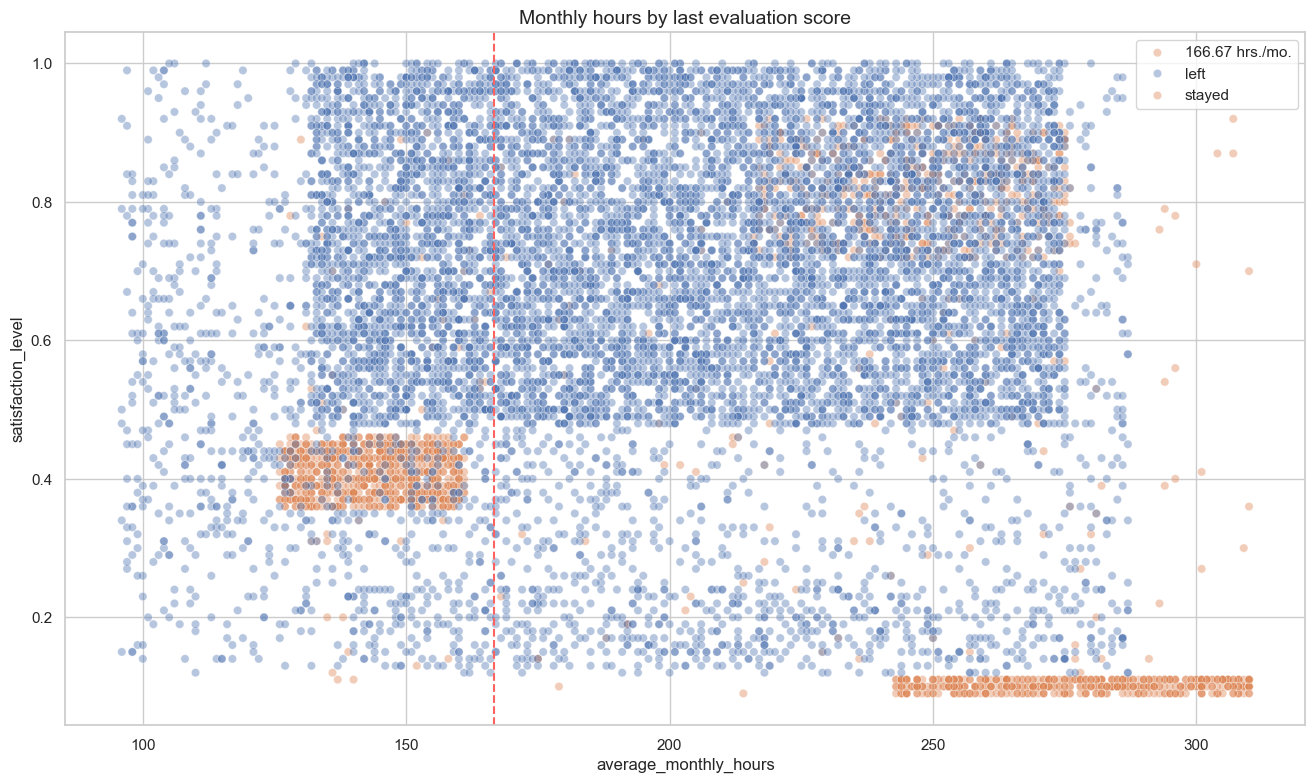

In [47]:
# Average monthly hours versus satisfaction levels

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

&rarr; The strange distribution here is indicative of data manipulation or synthetic data

&rarr; There was a sizeable group of employees who worked ~240–315 hours per month and have a satisfaction levels being close to zero. 315 hours per month is over 75 hours per week for a whole year

&rarr; The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4

&rarr; There is a group who worked ~210–280 hours per month, and they had satisfaction levels ranging ~0.7–0.9

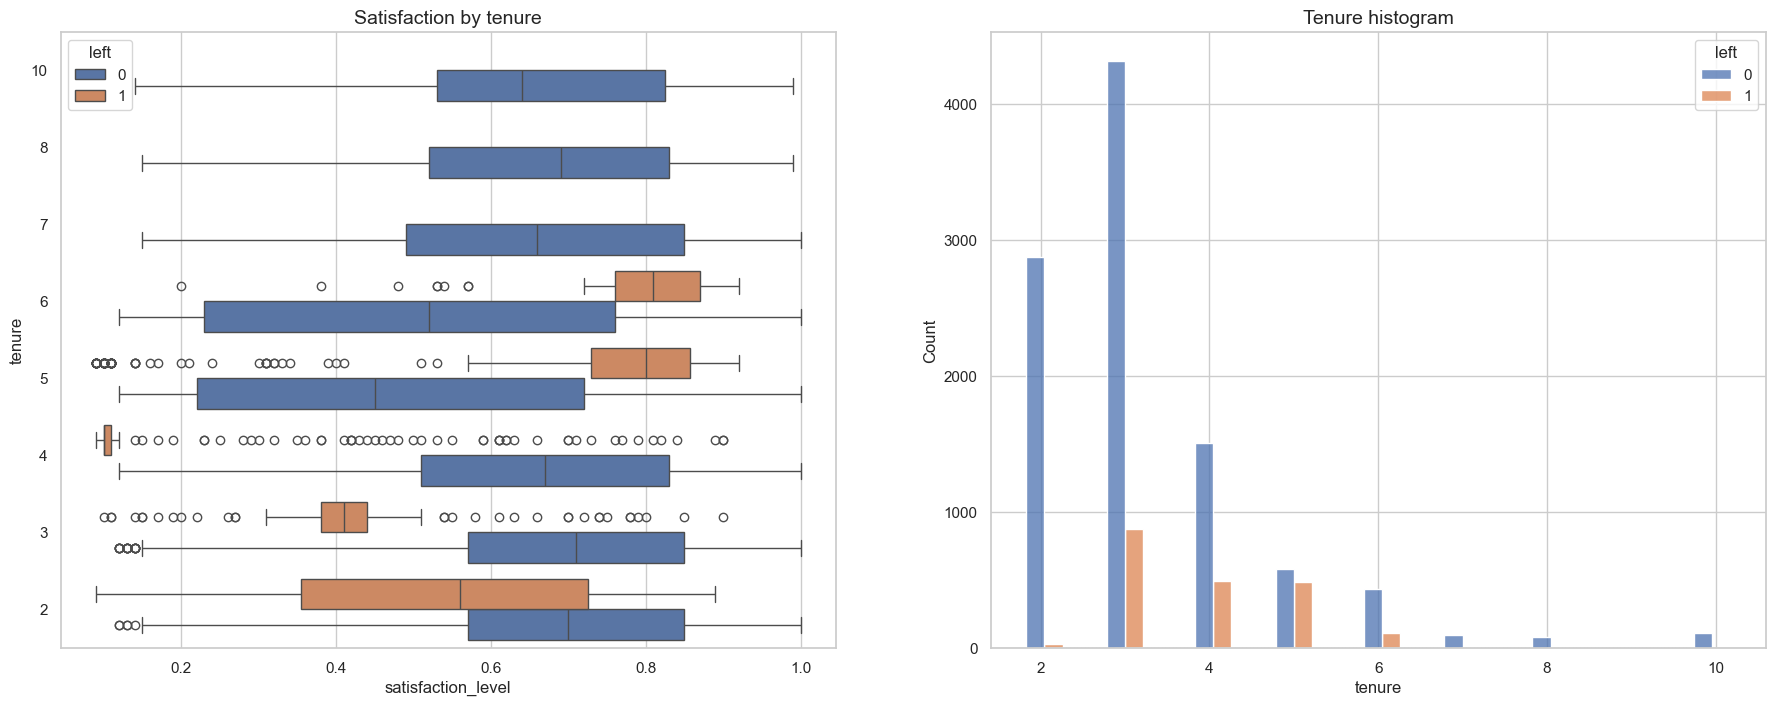

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Plot 1: Boxplot showing distributions of `satisfaction_level` by tenure, 
# comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Plot 2: Histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

Employees who left fall into two general categories: 

&rarr; Dissatisfied employees with shorter tenures 

&rarr; Very satisfied employees with medium-length tenures

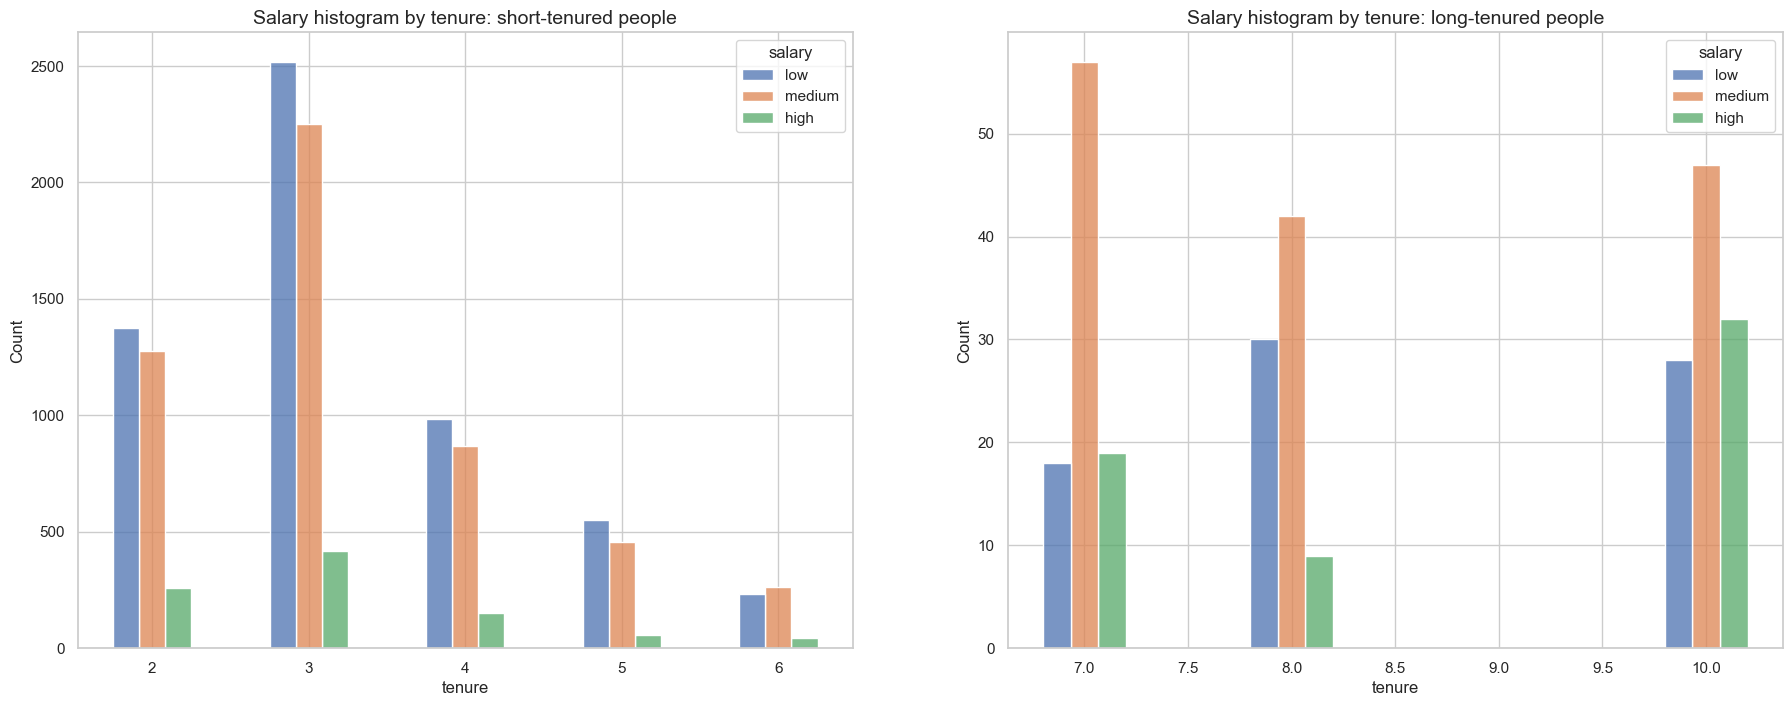

In [49]:
# Salary levels for different tenures

fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot 1: Short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot 2: long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

&rarr; The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees

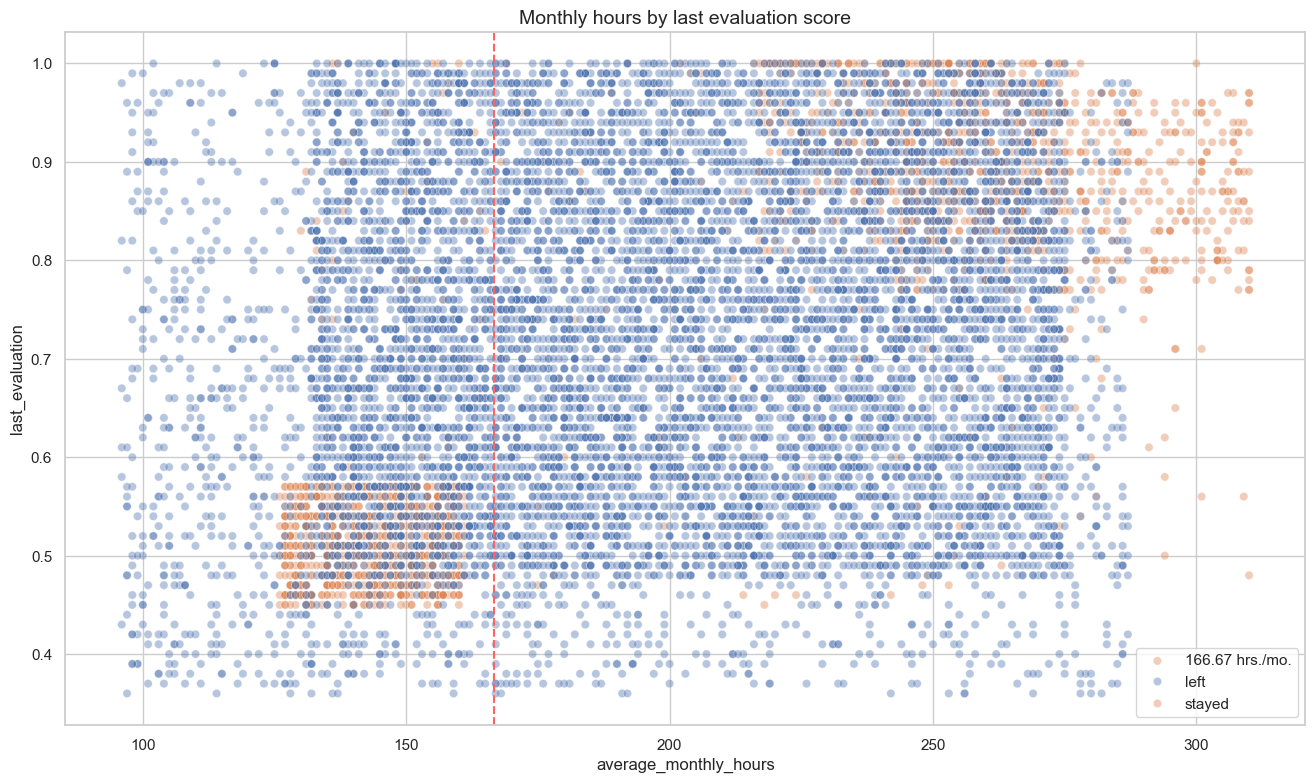

In [50]:
# Correlation between working long hours and receiving high evaluation 

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot indicates two groups of employees who left: 

&rarr; Overworked employees who performed very well

&rarr; Employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores

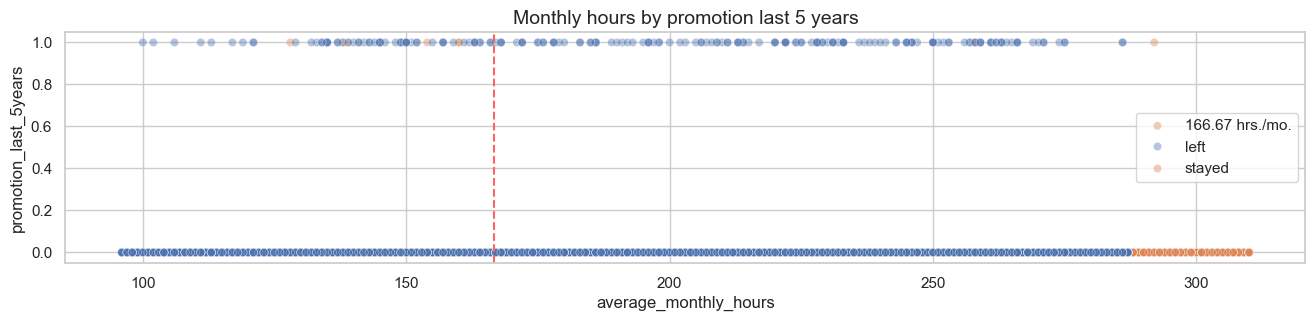

In [51]:
# Examine relationship between `average_monthly_hours` and `promotion_last_5years`

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

&rarr; Very few employees who were promoted in the last five years left

&rarr; Very few employees who worked the most hours were promoted

&rarr; All of the employees who left were working the longest hours

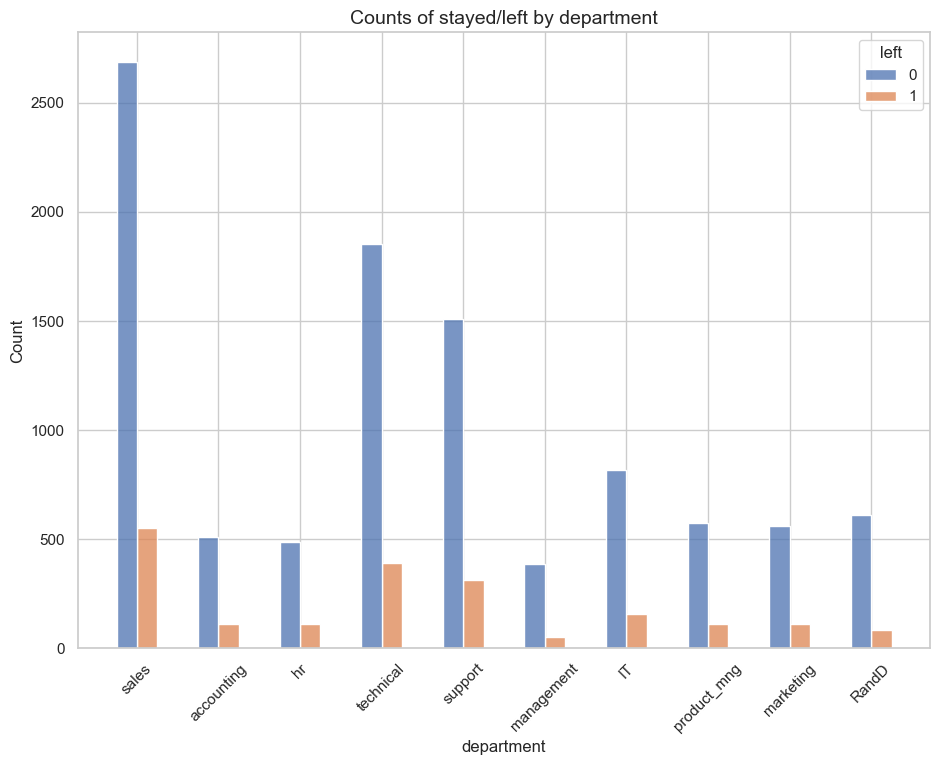

In [55]:
# Histogram to compare department distribution of employees who left vs stayed

plt.figure(figsize=(11, 8))
sns.histplot(data=df1, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=14);

&rarr; There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed

In [56]:
# Correlations between variables in the data

# Correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12);

ValueError: could not convert string to float: 'sales'

<Figure size 1600x900 with 0 Axes>

&rarr; The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level

### Insights

It appears that employees are leaving the company as a result of poor management:

- Leaving is tied to **longer working hours**, **many projects**, and generally **lower satisfaction levels**
- It can be ungratifying to **work long hours and not receive promotions** or good evaluation scores 
- There's a sizeable group of employees at this company who are probably burned out
- It also appears that if an employee has spent more than six years at the company, they tend not to leave

# paCe: Construct Stage

🔎
## Model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





### Type of prediction task

Prediction of categorial outcome varibale &rarr; **Binary classification**

### Most appropriate models for this task

- Logistic Regression
- Tree-based ML Models

### Modeling - Logistic Regression Model

In [57]:
# Copy the dataframe
df_enc = df1.copy()

# Encode `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


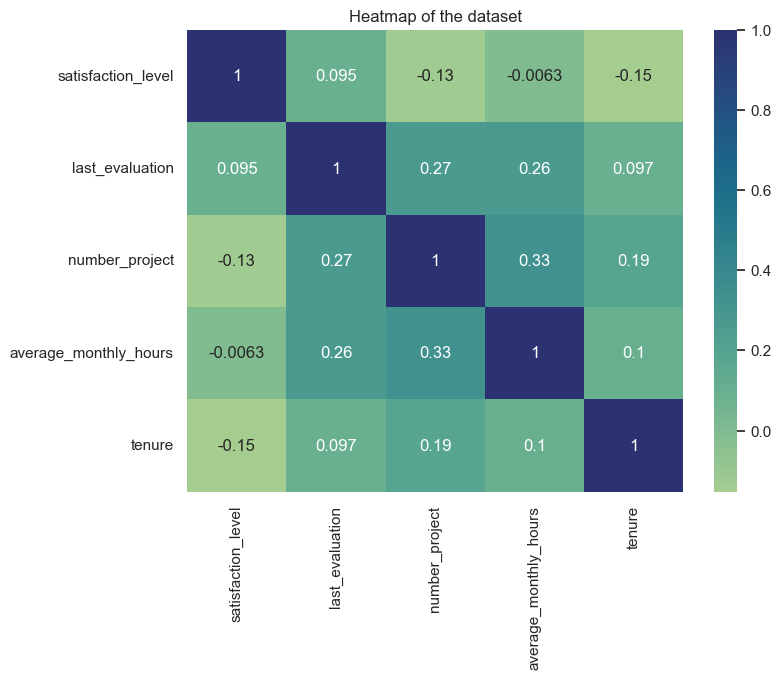

In [58]:
# Heatmap to visualize how correlated relevant variables

plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier

In [59]:
# Select rows without outliers

df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [60]:
# Outcome variable and Features

y = df_logreg["left"]

X = df_logreg.drop("left", axis=1)

In [61]:
# Train-Test-Split (75/25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [62]:
%%time
# Logistic regression model and fit it to the training dataset

log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

CPU times: user 3.89 s, sys: 3.49 s, total: 7.38 s
Wall time: 917 ms


In [63]:
# Preditctions on the test data

y_pred = log_clf.predict(X_test)

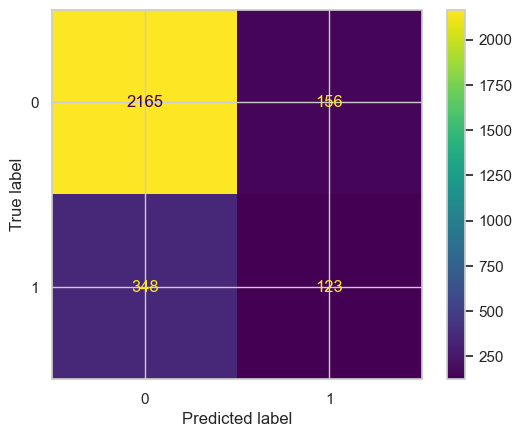

In [64]:
# Confusion matrix

log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

- **True negatives [0,0]**: The number of people who did not leave that the model accurately predicted did not leave
- **False positives [0,1]**: The number of people who did not leave the model inaccurately predicted as leaving
- **False negatives [1,0]**: The number of people who left that the model inaccurately predicted did not leave
- **True positives [1,1]**: The number of people who left the model accurately predicted as leaving

In [65]:
# Class balance
df_logreg["left"].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

~ 83%-17% split

&rarr; The data is not perfectly balanced, but it is not too imbalanced

In [66]:
# Classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



&rarr; Model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages)

&rarr; However, if it's most important to predict employees who leave, then the scores are significantly lower (44%, 26% and 33%, respectively)

### Modeling - Tree-based Model (Decision Tree & Random Forest)

In [67]:
# Outcome variable and Features

y = df_enc["left"]

X = df_enc.drop("left", axis=1)

In [68]:
# Train-Test-Split (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - Round 1

In [69]:
tree = DecisionTreeClassifier(random_state=0)

# Cross-validated grid-search

# Dictionary of hyperparameters
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [70]:
%%time 

tree1.fit(X_train, y_train)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'top_k_accuracy', 'roc_auc_ovr_weighted', 'balanced_accuracy', 'v_measure_score', 'neg_mean_poisson_deviance', 'precision_samples', 'positive_likelihood_ratio', 'rand_score', 'neg_mean_absolute_error', 'adjusted_mutual_info_score', 'completeness_score', 'mutual_info_score', 'neg_brier_score', 'average_precision', 'roc_auc_ovo_weighted', 'precision', 'recall_weighted', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_log_error', 'accuracy', 'recall_macro', 'recall_samples', 'roc_auc_ovo', 'recall', 'r2', 'adjusted_rand_score', 'f1_samples', 'jaccard_weighted', 'homogeneity_score', 'fowlkes_mallows_score', 'jaccard', 'jaccard_samples', 'neg_max_error', 'jaccard_macro', 'f1', 'precision_micro', 'explained_variance', 'neg_log_loss', 'f1_macro', 'matthews_corrcoef', 'neg_mean_squared_log_error', 'neg_negative_likelihood_ratio', 'd2_absolute_error_score', 'recall_micro', 'roc_auc_ovr', 'normalized_mutual_info_score', 'roc_auc', 'neg_root_mean_squared_error', 'neg_median_absolute_error', 'neg_mean_gamma_deviance', 'jaccard_micro', 'precision_weighted', 'f1_weighted', 'f1_micro', 'neg_mean_squared_error', 'precision_macro'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got {'recall', 'roc_auc', 'accuracy', 'precision', 'f1'} instead.

In [102]:
# Best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [103]:
# Best AUC score on CV
tree1.best_score_

0.969819392792457

In [104]:
# Helper function to extract all the scores from the grid search
def make_results(model_name: str, model_object, metric: str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                          })

    return table

In [105]:
# CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


&rarr; Scores indicate strong model performeance

### Random Forest - Round 1

In [111]:
rf = RandomForestClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }

# Scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [112]:
%%time

rf1.fit(X_train, y_train)

CPU times: user 9min 17s, sys: 0 ns, total: 9min 17s
Wall time: 9min 17s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

### Save model

In [131]:
path = '/Users/lennartmuller/Desktop/Google Certificate/Capstone'

In [137]:
import os
import pickle


def write_pickle(path, model_object, save_as: str):
    '''
    Save a model to a pickle file in the given path.
    '''
    # Ensure the directory exists
    os.makedirs(path, exist_ok=True)

    full_path = os.path.join(path, save_as + '.pickle')
    with open(full_path, 'wb') as to_write:
        pickle.dump(model_object, to_write)


def read_pickle(path, saved_model_name: str):
    '''
    Read a pickled model from the given path.
    '''
    full_path = os.path.join(path, saved_model_name + '.pickle')
    with open(full_path, 'rb') as to_read:
        model = pickle.load(to_read)
    return model

In [174]:
path = "models"

write_pickle(path, rf1, 'hr_rf1')
rf1 = read_pickle(path, 'hr_rf1')

In [175]:
# Best AUC score on CV
rf1.best_score_

0.9804250949807172

In [176]:
# Best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [177]:
# CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


### Evaluate model on test set

In [178]:
def get_scores(model_name: str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                          })

    return table

### Predictions on test data

In [179]:
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

ValueError: Number of features of the model must match the input. Model n_features is 18 and input n_features is 17 

&rarr; The evaluation scores of the random forest model are better than those of the decision tree model

### Feature Engineering

It's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

In [150]:
# Drop `satisfaction_level`
df2 = df_enc.drop('satisfaction_level', axis=1)

In [151]:
# `overworked` column
df2['overworked'] = df2['average_monthly_hours']

print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


175 monthly working hours as threshold for 'overworked'

In [152]:
df2["overworked"] = (df2["overworked"] > 175).astype(int)
df2["overworked"].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [153]:
# Drop `average_monthly_hours`
df2 = df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [155]:
y = df2["left"]

X = df2.drop('left', axis=1)

In [156]:
# Train-Test-Split (75/25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - Round 2

In [157]:
tree = DecisionTreeClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth': [4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [158]:
%%time

tree2.fit(X_train, y_train)

CPU times: user 2.32 s, sys: 0 ns, total: 2.32 s
Wall time: 2.32 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [159]:
# Best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [160]:
# Best AUC score on CV
tree2.best_score_

0.9586752505340426

In [161]:
# CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


&rarr; Slightly worse performance since fewer features were taken into account

&rarr; Still, good scores

### Random forest - Round 2

In [162]:
rf = RandomForestClassifier(random_state=0)

# Dictionary of hyperparameters
cv_params = {'max_depth': [3, 5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1, 2, 3],
             'min_samples_split': [2, 3, 4],
             'n_estimators': [300, 500],
             }

# Scoring metrics
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [163]:
%%time

rf2.fit(X_train, y_train)

CPU times: user 6min 58s, sys: 0 ns, total: 6min 58s
Wall time: 6min 58s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [166]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [167]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [168]:
# best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [169]:
# Best AUC score on CV
rf2.best_score_

0.9648100662833985

In [170]:
# CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


&rarr; Again, scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric

### Score the champion model on the test set

In [180]:
# Predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


&rarr; Stable, well-performing final model

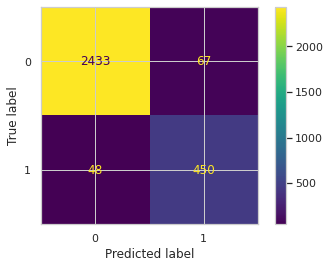

In [181]:
# Confusion matrix

preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf2.classes_)
disp.plot(values_format='');

&rarr; The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case

&rarr; Overall, this is a strong model

### Decision tree splits

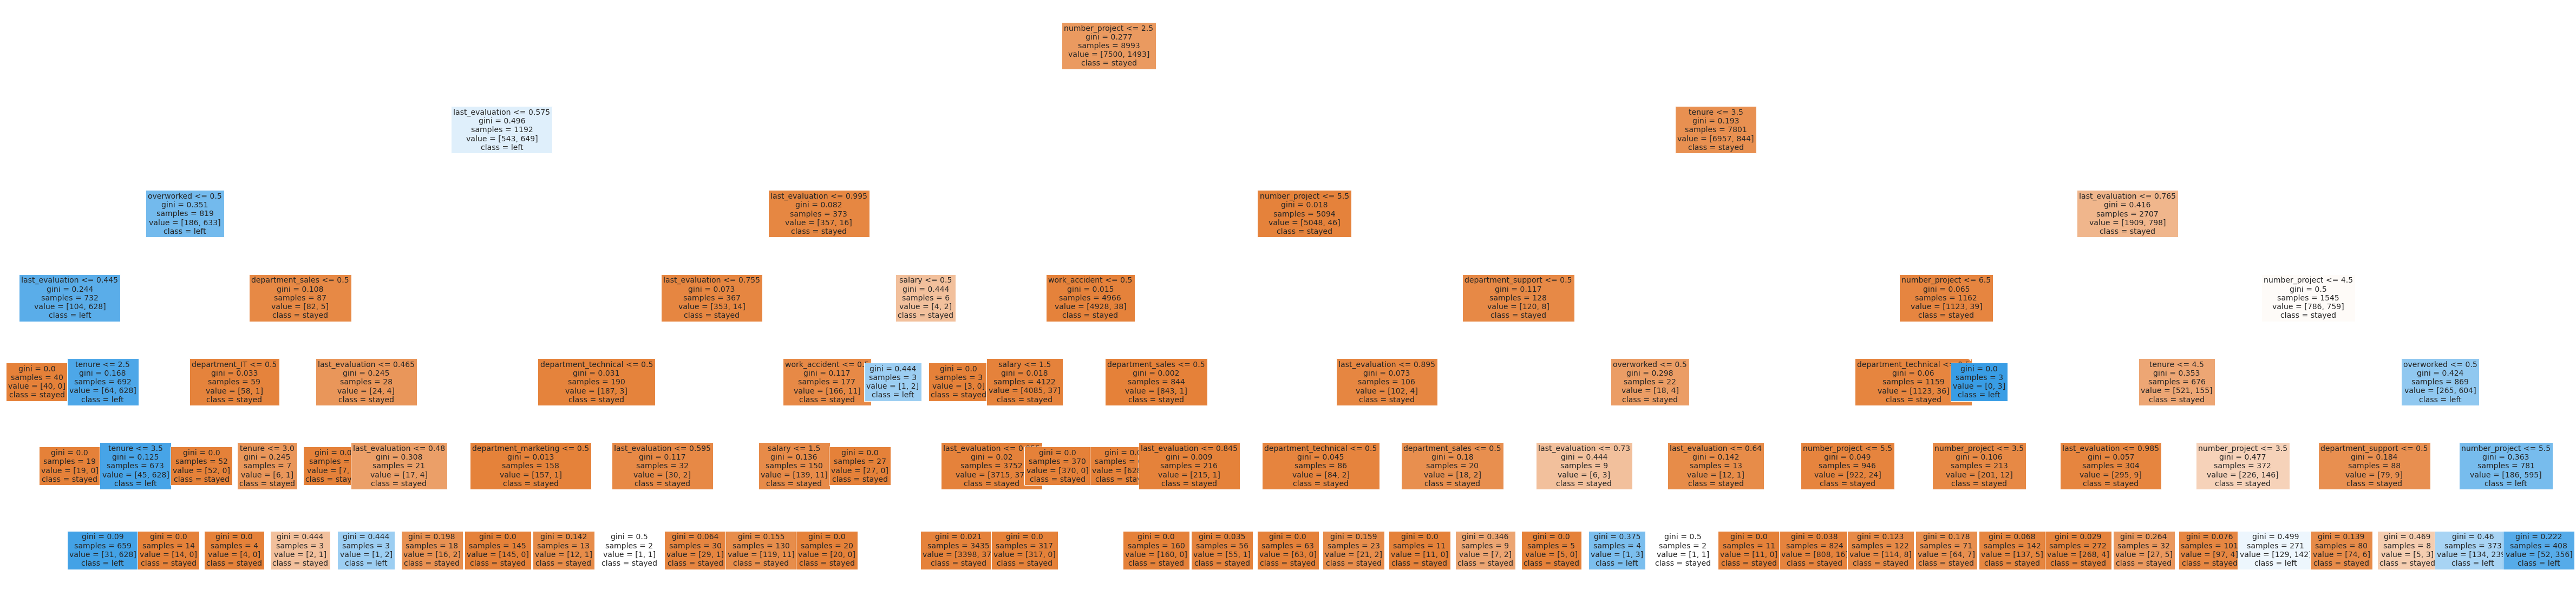

In [182]:
# Decision tree plot 

plt.figure(figsize=(85, 20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns,
          class_names={0: 'stayed', 1: 'left'}, filled=True);
plt.show()

### Decision tree feature importance

In [183]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                 columns=['gini_importance'],
                                 index=X.columns
                                 )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


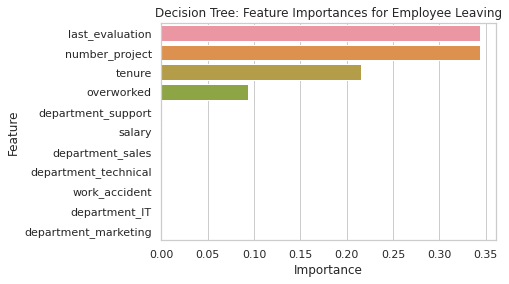

In [184]:
# Barplot to visualize the decision tree feature importances

sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

**Highest importance:**

- last_evaluation
- number_project
- tenure
- overworked

### Random forest feature importance

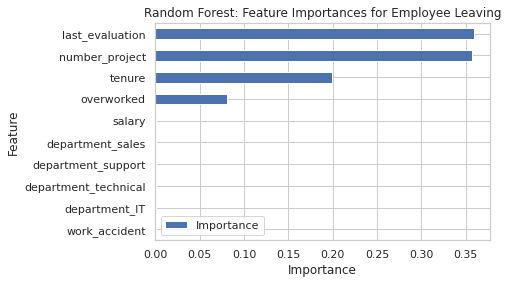

In [185]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh', ax=ax1, x="Feature", y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**Highest importance:**
    
- last_evaluation
- number_project
- tenure
- overworked

(same as decision tree model)

# pacE: Execute Stage

### Summary of model results

**Logistic Regression**

The logistic regression model achieved: 
- Precision of 80%
- Recall of 83%
- F1-score of 80% (all weighted averages)
- Accuracy of 83%
(on test set)

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved:
- AUC of 93.8%, precision of 87.0%
- Recall of 90.4%
- F1-score of 88.7%
- Accuracy of 96.2%
(on the test set) 

&rarr; The random forest modestly outperformed the decision tree model

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 